# Linear Discriminant Analysis (LDA)

Linear discriminant analysis (LDA) is a popular linear dimensionality reduction technique that can find a linear combination of input features in a lower dimensional space while maximizing class separability.

Class separability simply means that we keep classes as far as possible while maintaining minimum separation between the data points within each class.

LDA is often used with classification datasets that have class labels. 

## PCA vs LDA

PCA is the most popular dimensionality reduction technique. Both PCA and LDA are considered linear dimensionality reduction techniques as they find a linear combination of input features in the data.

However, there are notable differences between the two algorithms.

- PCA performs dimensionality reduction by maximizing the variance of the data. Therefore, in most cases, feature standardization is necessary before applying PCA. 
- LDA performs dimensionality reduction by maximizing the class separability of classification datasets. Feature standardization is optional.
- PCA does not require class labels. So, it can be used with classification, regression and even with unlabeled data!
- LDA reqiuress class labels. So, it is used with classification datasets.
- PCA finds a set of uncorrelated features in a lower dimensional space. PCA automatically removes multicollinearity in the data.
- The maximum number of components that PCA can find is equal to the number of input features (original dimensionality) of the dataset. 
- The maximum number of components that LDA can find is equal to the number of classes minus one in the classification dataset. For example, if there are only 3 classes in the dataset, LDA can find the maximum of 2 components.
- LDA is more effective than PCA for classification datasets. It is easier to draw decision boundaries for data with maximum class separability.

In [1]:
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data
y = wine.target

print("Wine dataset size:", X.shape)

Wine dataset size: (178, 13)


## Apply PCA to the Wine Data

### Feature standardization

Before applying PCA to the Wine data, we need to do feature standardization to get all features into the same scale.

In [2]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

### Running PCA

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

### Making the scatterplot

Text(0, 0.5, 'PC2')

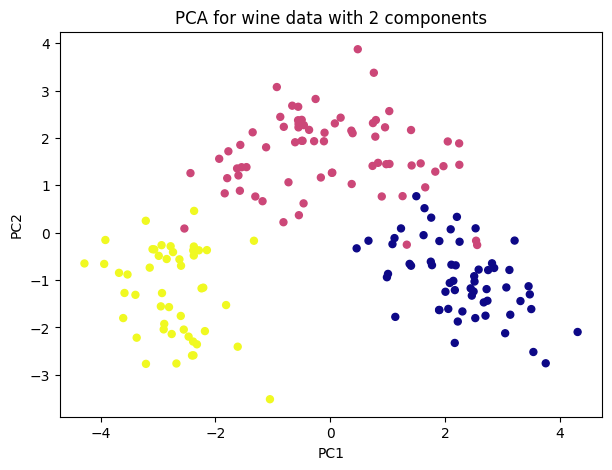

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=[7, 5])
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=25, cmap='plasma')
plt.title('PCA for wine data with 2 components')
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.savefig("PCA.png")

The data appears to be linearly separable with linear decision boundaries (i.e. straight lines). However, some data points would be misclassified. Classes have not been well separated since PCA doesn’t maximize class separability.

When applying PCA to the Wine data by keeping only two components, we lost a significant amount of variance in the data.

In [6]:
exp_var = sum(pca.explained_variance_ratio_ * 100)
print('Variance explained:', exp_var)

Variance explained: 55.40633835693531


Only about 55.4% of the variance was captured by our PCA model with two components. That much of variance is not good enough to accurately represent the original data.

Let’s find the optimal number of principal components for the Wine data by creating the following plot. The value should be greater than 2 but less than 13 (number of input features).

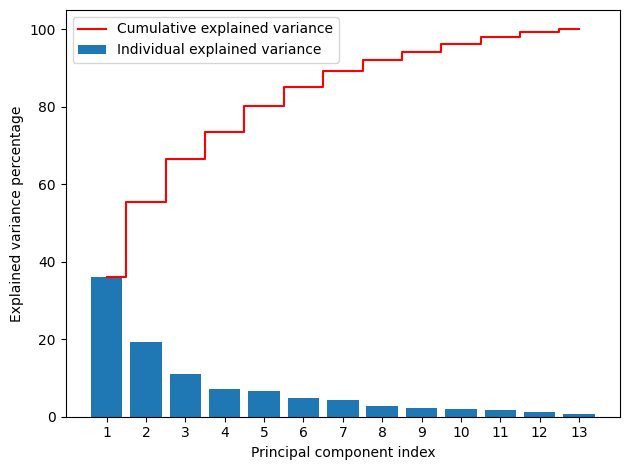

In [7]:
import numpy as np

pca = PCA(n_components=None)
X_pca = pca.fit_transform(X_scaled)

exp_var = pca.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)

plt.bar(range(1, 14), exp_var, align='center',
        label='Individual explained variance')

plt.step(range(1, 14), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.xticks(ticks=list(range(1, 14)))
plt.legend(loc='best')
plt.tight_layout()

# plt.savefig("Barplot_PCA.png")

## Apply LDA to the Wine Data

### Feature standardization

Feature standardization is not needed for LDA as it does not have any effect on the performance of the LDA model.

### Running LDA

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

### Making the scatterplot

Text(0, 0.5, 'Component 2')

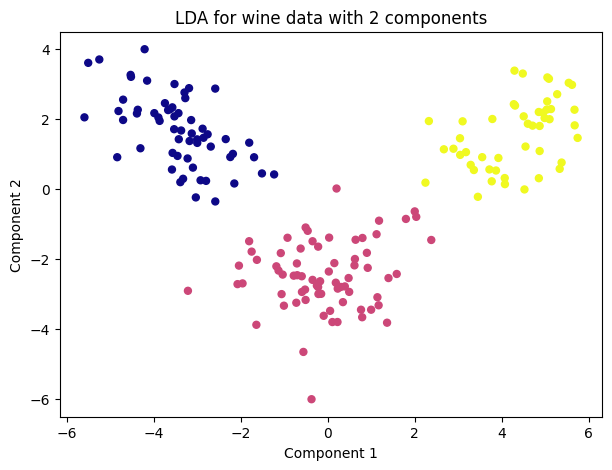

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=[7, 5])
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, s=25, cmap='plasma')
plt.title('LDA for wine data with 2 components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
#plt.savefig("LDA.png")

Now, the classes have been clearly separated since LDA maximizes class separability in addition to reducing dimensionality. The data points will not be misclassified when drawing linear decision boundaries.

The maximum number of components that LDA can keep for Wine data is also two because there are only three classes in the data. So, these two components should capture all the variance in the data.

Let’s verify this numerically and visually!

In [10]:
exp_var = sum(lda.explained_variance_ratio_ * 100)
print('Variance explained:', exp_var)

Variance explained: 100.0


All variance in the original Wine data was captured by our LDA model with two components. So, these components will fully represent the original data.

Let’s create the cumulative explained variance plot for the LDA model.

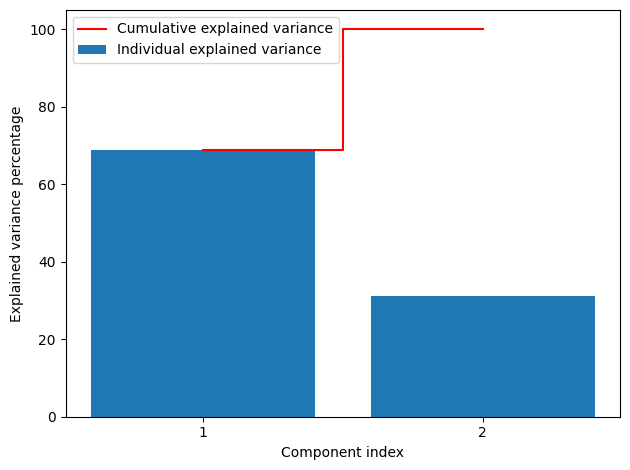

In [11]:
import numpy as np

lda = LinearDiscriminantAnalysis(n_components=None)
X_lda = lda.fit(X_scaled, y)

exp_var = lda.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)

plt.bar(range(1, 3), exp_var, align='center',
        label='Individual explained variance')

plt.step(range(1, 3), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Component index')
plt.xticks(ticks=[1, 2])
plt.legend(loc='best')
plt.tight_layout()

# plt.savefig("Barplot_LDA.png")

## Choosing the right number of components for LDA

The most important hyperparameter in both PCA and LDA algorithms is n_components in which we specify the number of components that LDA or PCA should find.

- The cumulative explained variance plot is extremely useful to choose the right number of components.

- The maximum number of components that LDA can find is equal to the number of classes minus one in the classification dataset.

- If the sole purpose of applying LDA is for data visualization, you should keep 2 (for 2D plots) or 3 (for 3D plots) components. 

## References

* [LDA Is More Effective than PCA for Dimensionality Reduction in Classification Datasets](https://towardsdatascience.com/lda-is-highly-effective-than-pca-for-dimensionality-reduction-in-classification-datasets-4489eade632)